In [8]:
%reload_ext autoreload

%autoreload 2


In [9]:
input_file = "../../test_data/system_tests/diann_charite_dataset/Charite-DIA-NN_analysis.txt"
#input_file = "../../test_data/system_tests/diann_charite_dataset/Charite-DIA-NN_analysis.txt.diann_precursor_filename_sampleid.aq_reformat.tsv"

directlfq_file = "../../test_data/system_tests/diann_charite_dataset/Charite-DIA-NN_analysis.txt.protein_intensities.tsv"

samplemap ="../../test_data/system_tests/diann_charite_dataset/samplemap_shortened.tsv"

diann_lfq_file = "../../test_data/system_tests/diann_charite_dataset/Charite-DIA-NN_analysis.txt.diann_gene.aq_reformat.tsv"
iq_lfq_file = "../../test_data/system_tests/diann_charite_dataset/report-charite-iq.tsv"

outfile = "../../test_data/system_tests/diann_charite_dataset/onefilt_density_true.pdf"

run_directlfq = True

In [10]:
if run_directlfq:
    import directlfq.lfq_manager as lfqmgr

    lfqmgr.run_lfq(input_file=input_file, input_type_to_use="diann_fragion_isotopes_raw_charite_dataset", min_nonan=3)



/Users/constantin/workspace/directlfq/directlfq/utils.py:753: ResourceWarning: unclosed file <_io.TextIOWrapper name='/Users/constantin/workspace/directlfq/directlfq/configs/intable_config.yaml' mode='r' encoding='UTF-8'>
  config_dict = load_config(INTABLE_CONFIG)


using input type diann_fragion_isotopes_raw_charite_dataset
394 prots total
using 10 processes
prot 0
prot 100
prot 200
prot 300


/Users/constantin/workspace/directlfq/directlfq/utils.py:753: ResourceWarning: unclosed file <_io.TextIOWrapper name='/Users/constantin/workspace/directlfq/directlfq/configs/intable_config.yaml' mode='r' encoding='UTF-8'>
  config_dict = load_config(INTABLE_CONFIG)


In [11]:

import directlfq.benchmarking as lfqbenchmark
restable_directlfq = lfqbenchmark.ResultsTableBiological(results_file=directlfq_file, samplemap=samplemap, name="directLFQ")
cvinfo_directlfq = lfqbenchmark.CVInfoDataset(restable_directlfq)

In [12]:
import directlfq.benchmarking as lfqbenchmark
restable_diann = lfqbenchmark.ResultsTableBiological(results_file=diann_lfq_file, samplemap=samplemap, name = "MaxLFQ_DIANN")
cvinfo_diann = lfqbenchmark.CVInfoDataset(restable_diann)

In [13]:
import directlfq.benchmarking as lfqbenchmark
restable_iq = lfqbenchmark.ResultsTableBiological(results_file=iq_lfq_file, samplemap=samplemap, name = "MaxLFQ_iQ")
cvinfo_iq = lfqbenchmark.CVInfoDataset(restable_iq)

27 are very large for directLFQ
1787
0.13936626711342312
0.11128118020229363
50 are very large for MaxLFQ_DIANN
1982
0.1632490777950846
0.13240989113091897
10 are very large for MaxLFQ_iQ
1698
0.13798939045114358
0.12633659011044102


/Users/constantin/workspace/directlfq/directlfq/visualizations.py:47: UserWarning: Trying to register the cmap 'alphapept_linear' which already exists.
  matplotlib.cm.register_cmap(name, linmap)
/Users/constantin/workspace/directlfq/directlfq/visualizations.py:47: UserWarning: Trying to register the cmap 'alphapept_linear_cut' which already exists.
  matplotlib.cm.register_cmap(name, linmap)


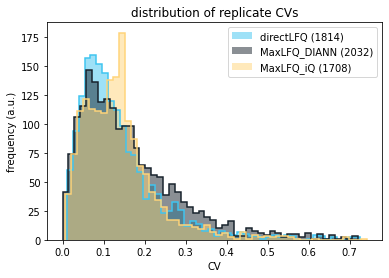

In [14]:
import matplotlib.pyplot as plt
ax = plt.subplot()
lfqbenchmark.CVDistributionPlotter(list_of_dataset_cv_infos=[cvinfo_directlfq, cvinfo_diann, cvinfo_iq], ax = ax,cumulative=False, density=False, bins=50, histtype='step')
ax.legend()

ax.set_title("distribution of replicate CVs")
ax.set_xlabel("CV")
ax.set_ylabel('frequency (a.u.)')

plt.savefig(outfile)
